In [59]:
# This cell expands the cells of the notebook to the width of the window
from IPython.display import display, HTML
display(HTML("<style>div.cell {width:100% !important;}</style>"))

# Week 5

## Python setup

In [2]:
%%capture
pip install fa2_modified

In [50]:
%%capture
pip install powerlaw

In [51]:
from fa2_modified import ForceAtlas2
import math
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib import colormaps
import networkx as nx
import numpy as np
import os
import powerlaw
import random
import re
from statistics import mean, median, mode
import urllib.request

## Exercises Part A: Visualizations

In this section, we are introduced to the library [ForceAtlas2 (_Modified version)_](https://github.com/AminAlam/fa2_modified). The library is a more powerful alternative to the networkX library and can help create better visualisations.

In [4]:
# Folder to store the text files
cwd = os.getcwd()
folder_name = "saved_graphs"
folder_path = os.path.join(cwd, folder_name)
folder_path

'/home/aleksandar-lukic/School/02805_Social_Graphs_and_Interactions/Exercise_solutions/saved_graphs'

In [5]:
# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")

In [6]:
# load graph object from file
G = nx.read_gexf(file_path)

### A.1 Plot the Network using ForceAtlas2

Below is the code taken from the example in the documentation:

In [7]:
# We remove orphan nodes so our visualization isnt distorted by nodes that aren't connected to the other ones
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]
G.remove_nodes_from(to_be_removed)

In [8]:
# Create ForceAtlas2 configuration
fa2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=4.0,

    # Performance
    jitterTolerance=8.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=0.1,

    # Log
    verbose=True
    )

In [9]:
# Running the algorithm to get node positions
positions = fa2.forceatlas2_networkx_layout(G, pos=None, iterations=200)

100%|██████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 91.07it/s]

BarnesHut Approximation  took  0.35  seconds
Repulsion forces  took  1.62  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.10  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


In [10]:
# Extract the 'length_of_content' attribute values
lengths = nx.get_node_attributes(G, 'length_of_content').values()

# Normalize these values to range [0, 1] for colormap application
norm = mcolors.Normalize(vmin=min(lengths), vmax=max(lengths))

# Choose a colormap; e.g., 'rainbow'
cmap_ = cm.rainbow

# Map each node's 'length_of_content' to a color
node_colors = [cmap_(norm(length)) for length in lengths]

# Set node sizes based on node degrees (scaled for visibility)
node_sizes = [G.degree(node) * 3 for node in G.nodes]  # Multiplied by 300 for better scaling

/home/aleksandar-lukic/anaconda3/envs/02805/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


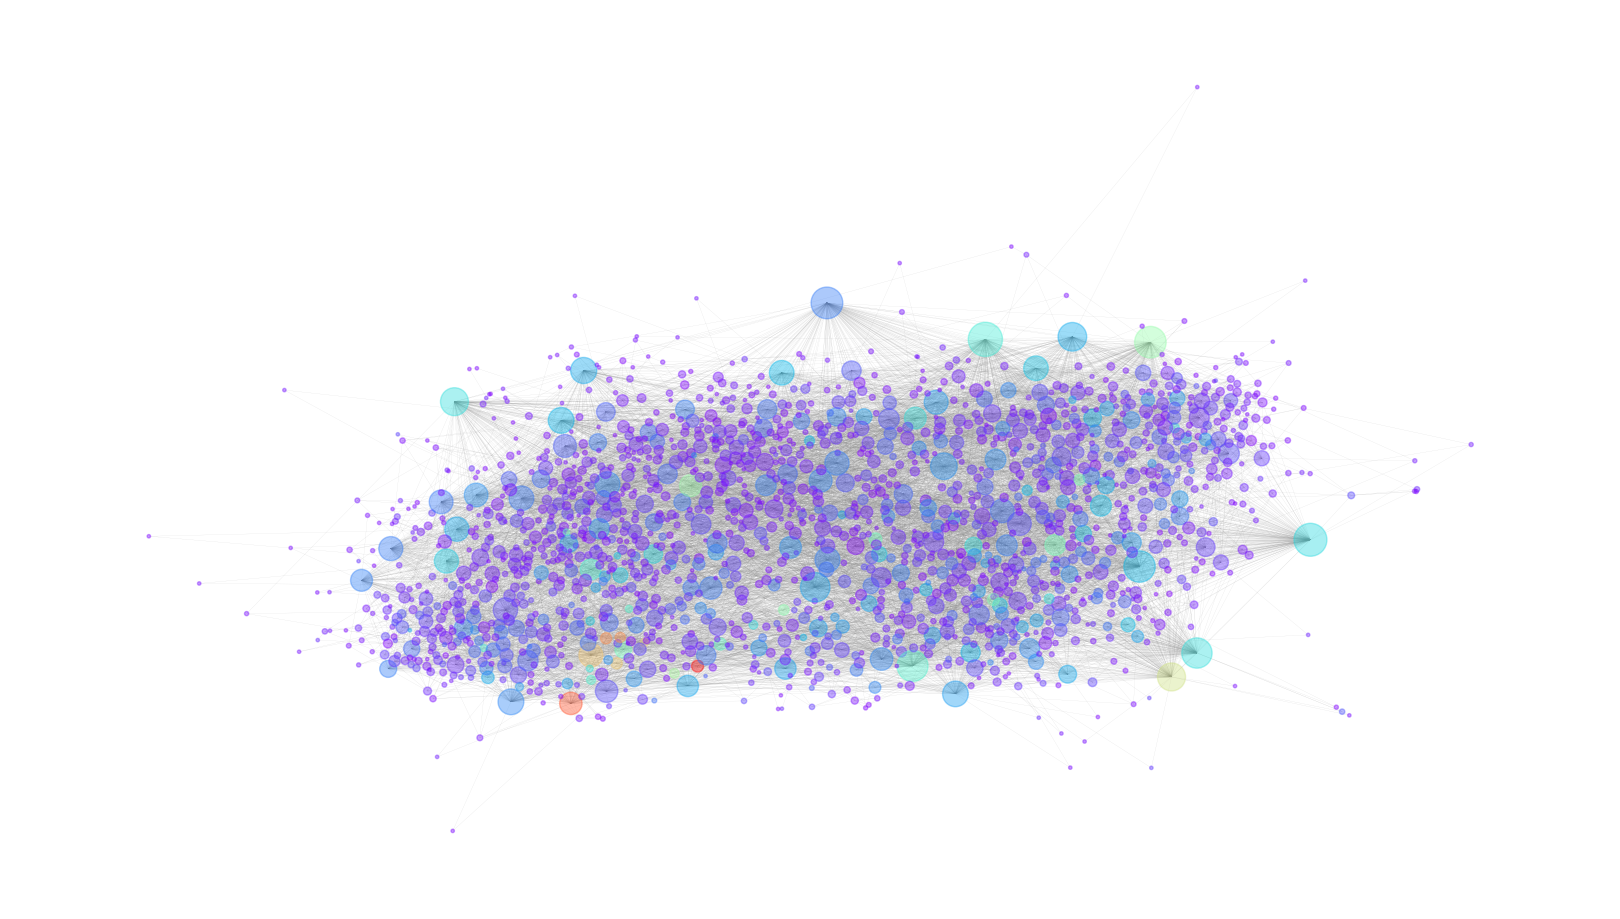

In [11]:
plt.figure(figsize=(16, 9))

nx.draw(
    G,
    pos=positions,
    cmap=cmap_, 
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.4,
    width=0.1,
    edge_color="grey",
    with_labels=False
)

plt.axis('off')

plt.show()

### A.2 Quantative inspection of Wikipedia pages

In [12]:
# load graph object from file and make it directional graph
file_path_dir = os.path.join(folder_path, "country_musicians_directed.gexf")
GD = nx.read_gexf(file_path_dir)

In [13]:
# sort nodes after in/out-degree
GD_sorted_in_degrees = sorted(GD.in_degree, key=lambda x: x[1], reverse=True)
GD_sorted_out_degrees = sorted(GD.out_degree, key=lambda x: x[1], reverse=True)

In [14]:
# Extract in/out-degree from nodes and store separately
GD_in_degree_values = [x[1] for x in GD_sorted_in_degrees]
GD_out_degree_values = [x[1] for x in GD_sorted_out_degrees]

#### A.2.1 
#### In-degree analysis

In [15]:
# Get nodes with the highest in-degree and their artist names
highest_in_degree = GD_sorted_in_degrees[0][1]
nodes_with_highest_in_degree = [node for node, degree in GD_sorted_in_degrees if degree == highest_in_degree]

print("Artist(s) with the highest in-degree:", *nodes_with_highest_in_degree)
print("Highest in-degree value:", highest_in_degree)


Artist(s) with the highest in-degree: Willie Nelson
Highest in-degree value: 188


In [16]:
nodes_with_highest_in_degree[0]

'Willie Nelson'

In [17]:
GD.nodes[nodes_with_highest_in_degree[0]]

{'url': 'https://en.wikipedia.org/wiki/Willie_Nelson',
 'txt_file': 'Willie_Nelson.txt',
 'length_of_content': 23360,
 'label': 'Willie Nelson'}

In [18]:
list_of_in_going_links = list(GD.in_edges(nodes_with_highest_in_degree[0]))
print(f"[ {len(list_of_in_going_links)} ingoing links for {nodes_with_highest_in_degree[0]} ]")
print(*zip([l[0] for l in list_of_in_going_links], [GD.nodes[l[0]]["url"] for l in list_of_in_going_links][:10]), sep="\n")

[ 188 ingoing links for Willie Nelson ]
('Tanya Tucker', 'https://en.wikipedia.org/wiki/Tanya_Tucker')
('Loretta Lynn', 'https://en.wikipedia.org/wiki/Loretta_Lynn')
('Julianne Hough', 'https://en.wikipedia.org/wiki/Julianne_Hough')
('Dwight Yoakam', 'https://en.wikipedia.org/wiki/Dwight_Yoakam')
('George Jones', 'https://en.wikipedia.org/wiki/George_Jones')
('Patsy Cline', 'https://en.wikipedia.org/wiki/Patsy_Cline')
('Trisha Yearwood', 'https://en.wikipedia.org/wiki/Trisha_Yearwood')
('Kris Kristofferson', 'https://en.wikipedia.org/wiki/Kris_Kristofferson')
('Toby Keith', 'https://en.wikipedia.org/wiki/Toby_Keith')
('Aaron Watson', 'https://en.wikipedia.org/wiki/Aaron_Watson')


By looking through some of the urls of ingoing links, we can get a picture of how Willie Nelson has contributed to many different communities within the country music scene and has played along and inspired many other artists.

#### Out-degree analysis

In [19]:
# Get nodes with the highest out-degree and artist names
highest_out_degree = GD_sorted_out_degrees[0][1]
nodes_with_highest_out_degree = [node for node, degree in GD_sorted_out_degrees if degree == highest_out_degree]

print("Nodes with the highest out-degree:", nodes_with_highest_out_degree)
print("Highest out-degree value:", highest_out_degree)

Nodes with the highest out-degree: ['Hillary Lindsey']
Highest out-degree value: 100


In [20]:
nodes_with_highest_out_degree[0]

'Hillary Lindsey'

In [21]:
GD.nodes[nodes_with_highest_out_degree[0]]

{'url': 'https://en.wikipedia.org/wiki/Hillary_Lindsey',
 'txt_file': 'Hillary_Lindsey.txt',
 'length_of_content': 5374,
 'label': 'Hillary Lindsey'}

In [22]:
list_of_out_going_links = list(GD.out_edges(nodes_with_highest_out_degree[0]))
print(f"[ {len(list_of_out_going_links)} outgoing links for {nodes_with_highest_out_degree[0]} ]")
print(*[l[1] for l in list_of_out_going_links][:10], sep="\n")

[ 100 outgoing links for Hillary Lindsey ]
Michelle Branch
Faith Hill
Martina McBride
Lady A
Gary Allan
Sara Evans
Carrie Underwood
Kellie Pickler
Bon Jovi
Taylor Swift


If we look at the wikipedia page of Hillary Lindsey, we will find that she has had a long career of co-writing songs with other artists. This list turns out to be rather cumbersome which explains her very high out-degree. Without looking too much into the others on this list it might be a fair assumption, that musicians with many outgoing references have a history of songwriting or producing with other known artists. 

#### A.2.2 Scatter plot

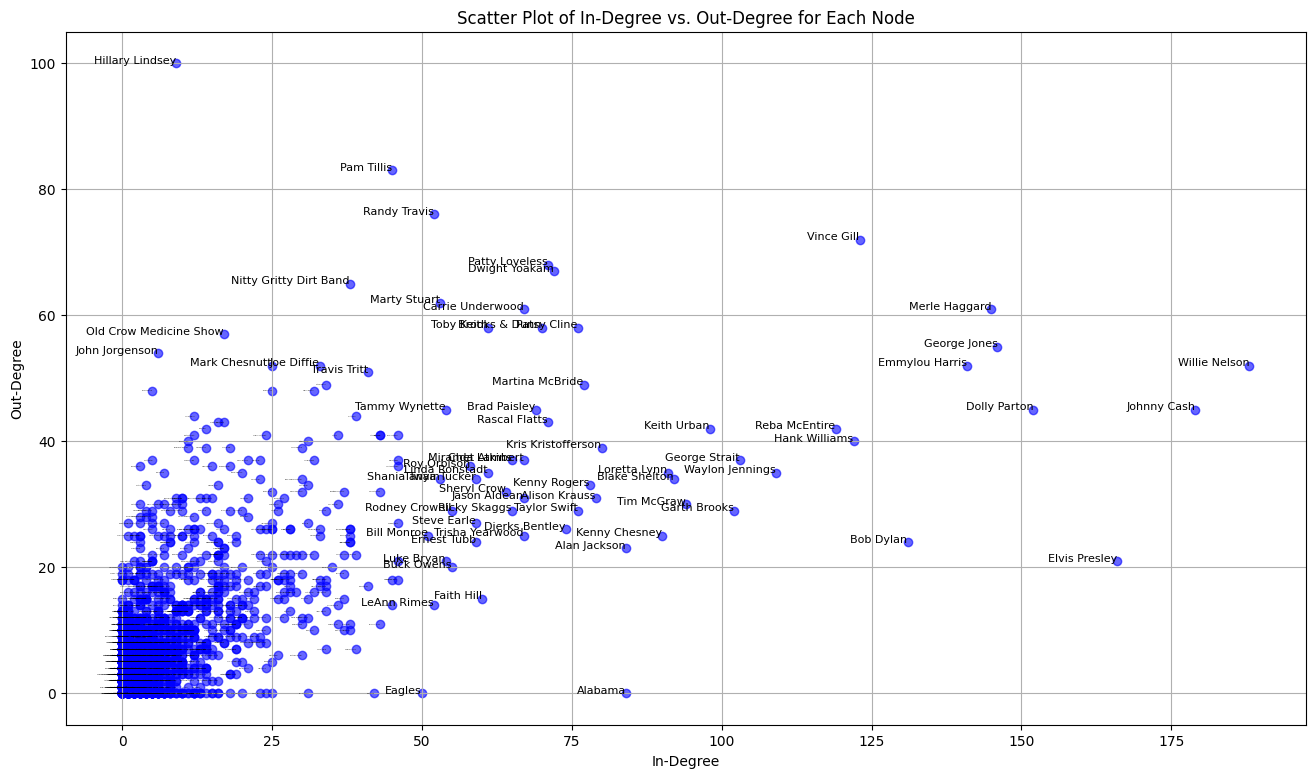

In [23]:
# Get in-degree and out-degree for each node
in_degrees = dict(GD.in_degree())
out_degrees = dict(GD.out_degree())

# Extract lists of nodes, in-degrees, and out-degrees
nodes = list(GD.nodes())
in_deg_values = [in_degrees[node] for node in nodes]
out_deg_values = [out_degrees[node] for node in nodes]

# Create scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(in_deg_values, out_deg_values, color='blue', alpha=0.6)

# Annotate each point with the node name (author's name)
for node in nodes:
    x = in_degrees[node]
    y = out_degrees[node]
    plt.text(x, y, node, fontsize= 8 if x>=50 or y>=50 else 0, ha='right', color='black')

# Label axes and title
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of In-Degree vs. Out-Degree for Each Node')
plt.grid(True)
plt.show()


By backtracking and looking at the URLs created by our regex patterns back in Week 4, we can see that there is an unaccounted challenge regarding the redirecting links based on parenthesees. Bands with generic names, such as the mentioned _Alabama_ (also the name of a state in USA) and _The Eagles_ (a commonly known bird), these redirect links causes the out-going edges to fail and txt files to be empty. 

Since this issue was only caused to a few outliers, we decided not to fix the issue for the time being.

## Exercises Part B: Advanced Tools

### B.1 Analysis of directed graph

In [24]:
len(GD.nodes())

2002

In [25]:
len(GD.edges())

16724

### B.1.1 What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

In [48]:
print("[IN-DEGREE]")
print("  median", median(GD_in_degree_values))
print("  mean", mean(GD_in_degree_values))
print("  mode", mode(GD_in_degree_values))
print("  min", min(GD_in_degree_values))
print("  max", max(GD_in_degree_values))

[IN-DEGREE]
  median 3.0
  mean 8.353646353646354
  mode 1
  min 0
  max 188


In [47]:
print("[OUT-DEGREE]")
print("  median", median(GD_out_degree_values))
print("  mean", mean(GD_out_degree_values))
print("  mode", mode(GD_out_degree_values))
print("  min", min(GD_out_degree_values))
print("  max", max(GD_out_degree_values))

[OUT-DEGREE]
  median 5.0
  mean 8.353646353646354
  mode 0
  min 0
  max 100


In [57]:
in_degreee_exponent = powerlaw.Fit(GD_in_degree_values).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [58]:
print(in_degreee_exponent)

2.6876958408783373


In [55]:
out_degreee_exponent = powerlaw.Fit(GD_out_degree_values).alpha

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [56]:
print(out_degreee_exponent)

7.3620675045925275


The in-degree exponent of 2.7 suggests a scale-free structure with hubs in terms of incoming connections, while the high out-degree exponent of 7.4 indicates a much more uniform distribution in outgoing links, implying most nodes have similar, low out-degrees. This asymmetry points to a network where few nodes attract many connections, but those nodes do not reciprocate with similarly high out-degrees.

### B.1.2 Heatmap of in-degree versus out-degree 

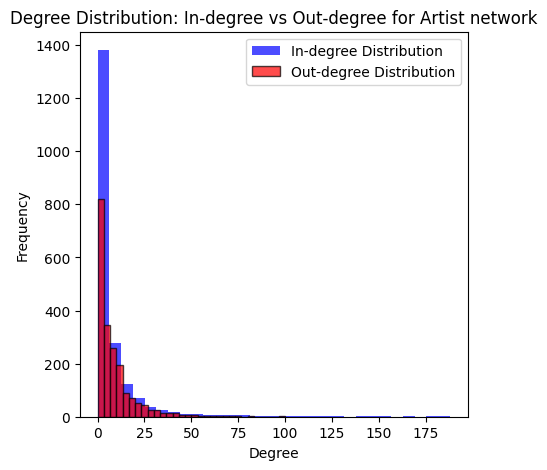

In [79]:
# Set size of figure
plt.figure(figsize=(5, 5))

# Histogram of In-degree Distribution
plt.hist(
    GD_in_degree_values, 
    bins=30, 
    alpha=0.7, 
    label="In-degree Distribution", 
    color="blue"
)

# Histogram of Out-degree Distribution
plt.hist(
    GD_out_degree_values, 
    bins=30, 
    alpha=0.7, 
    label="Out-degree Distribution", 
    color="red",
    edgecolor="black"
)

# Settings of axis/plot
plt.xlabel("Degree")
plt.ylabel("Frequency")
# plt.yscale('log')
plt.legend()
plt.title("Degree Distribution: In-degree vs Out-degree for Artist network")
plt.show()

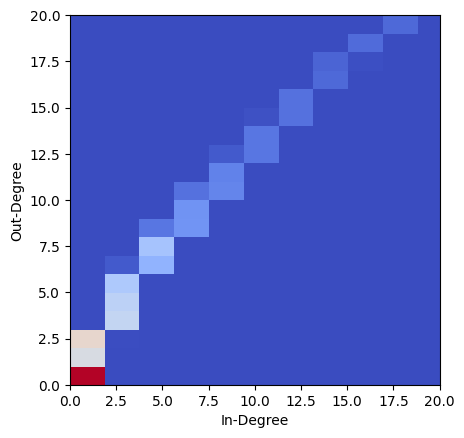

In [77]:
# Generate some test data
x = GD_in_degree_values
y = GD_out_degree_values

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='coolwarm')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.show()

The heatmap is effective for getting an idea of where there is a ...

1.Find the 5 most central characters according to degree centrality.

2.Find the 5 most central characters according to betweenness centrality.

3.Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).

4.Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?

5.Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.

6.Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?

7.What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes N and probablity of connection p?

## Part C

Exercise 5: Visualizing the Network Backbone

1.Extract the network backbone for both Weighted Network 1 and 2. You can implement it yourself based on the scientific paper or find an implentation on GitHub (there are several ones to choose from ... I like this implementation, which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of α to get an aestetically pleasing visualization (but don't make the resulting network too sparse).

2.Plot the resulting two networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.

3.Comment on your results

- Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the two networks. Describe your findings in your own words.
- Weighted network 1 and 2 are very different. We have removed edges with low/high edge betweenness centrality respectively. What has that done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structure.
